# Logistic Regression Homework

This is the 2nd assignment for CAP 4630 and we will implement logistic regression and apply it to two
different datasets. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 72 Points)** \
You are **not** allowed to use Machine Learning libaries such as Scikit-learn and Keras.

**Task Overview:**
- Logistic Regression

## 1 - Logistic Regression ##
### 1.1 Packages

Import useful packages for scientific computing and data processing.

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the pyplot function in the libraray of matplotlib and rename it to plt.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

**Attention:**
1. After this renaming, you will use the new name to call functions. For example, **numpy** will become **np** in the following sections.

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 1.2 - Data Preparation ##

Prepare the data for regression task. **(15 Points)**

**Tasks:**
1. Load data for logistic regression.
2. **Generate the SCATTER PLOT of the data**.

**Hints:**
1. The data file is "data_logistic.csv", which are exam scores for students.
2. The data is organized by column: x1 (exam 1 score), x2 (exam 2 score), and label y (pass 1 or fail 0).
3. Please use different colors for postive(label=1) and negative(label=0) data.
4. An example of scatter plots is shown below.

![](https://drive.google.com/uc?export=view&id=1CPv5s4W8SkUMa_sXCIz-NejSnFj-e1IH)

           x1         x2  label
0   75.013658  30.603263      0
1   55.482161  35.570703      0
2   95.861555  38.225278      0
3   93.114389  38.800670      0
4   56.253817  39.261473      0
..        ...        ...    ...
75  78.635424  96.647427      1
76  40.457551  97.535185      1
77  69.364589  97.718692      1
78  33.915500  98.869436      0
79  39.538339  98.955421      0

[80 rows x 3 columns]
x1:
[75.01365839 55.48216114 95.86155507 93.1143888  56.2538175  82.36875376
 66.56089447 74.78925296 60.45555629 82.22666158 67.37202755 32.72283304
 34.21206098 80.19018075 89.84580671 94.83450672 51.04775177 67.94685548
 51.54772027 35.28611282 76.97878373 83.48916274 50.53478829 30.05882245
 61.83020602 49.07256322 62.22267576 54.63510555 69.07014406 83.90239366
 85.40451939 57.23870632 52.34800399 66.74671857 52.10797973 55.34001756
 38.7858038  94.44336777 89.67677575 44.66826172 67.31925747 99.31500881
 77.92409145 52.04540477 88.91389642 74.24869137 62.27101367 77.19303493
 51.9

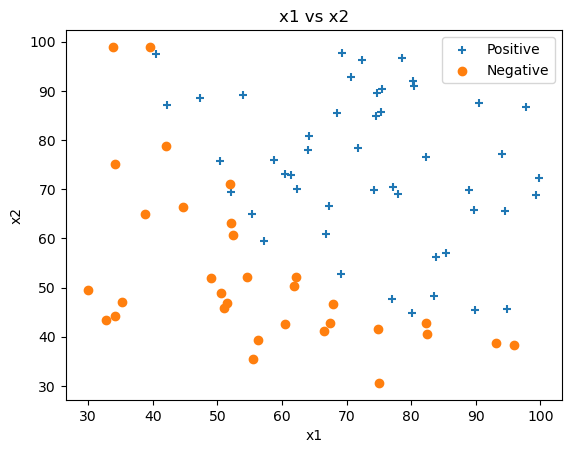

In [11]:
df = pd.read_csv('data_logistic.csv')

print(df)

x1 = df['x1'].to_numpy()
x2 = df['x2'].to_numpy()
y_true = df['label'].to_numpy()

print(f'x1:\n{x1}\n\n x2:\n{x2}\n\n y_true:\n{y_true}')

x1_one_rows = df[df['label']==1]['x1']
x2_one_rows = df[df['label']==1]['x2']
x1_zero_rows = df[df['label']==0]['x1']
x2_zero_rows = df[df['label']==0]['x2']

# the rows where class is 1 and plot them with '+' marker
plt.scatter(x1_one_rows, x2_one_rows, marker='+', label="Positive")

# the rows where class is 0 and plot them with 'o' marker 
plt.scatter(x1_zero_rows, x2_zero_rows, marker='o', label="Negative")

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('x1 vs x2')
plt.show()

### 1.3 - Sigmoid function ##


Implement sigmoid function so it can be called by the rest of your program. **(15 Points)**

**Tasks:**
1. Implement the sigmoid function (**def sigmoid(z):**).
2. Test the sigmoid function by function **plotting** with test data (X, Y) where Y = sigmoid(X).

**Hints:**  
1. Given the class material, sigmoid function is defined as:
$g(z) = \frac{1}{1+e^{-z}}$.
2. You may consider X = np.linspace(-5, 5, 1000) to plot the curve.
3. Plot Y against X.
4. An example of plot for validation is shown below:

![](https://drive.google.com/uc?export=view&id=18j5oHdw78uVm2WwHsdIb4hwhpXDxR37S)

### Sigmoid function:

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Text(0.5, 1.0, 'sigmoid plot')

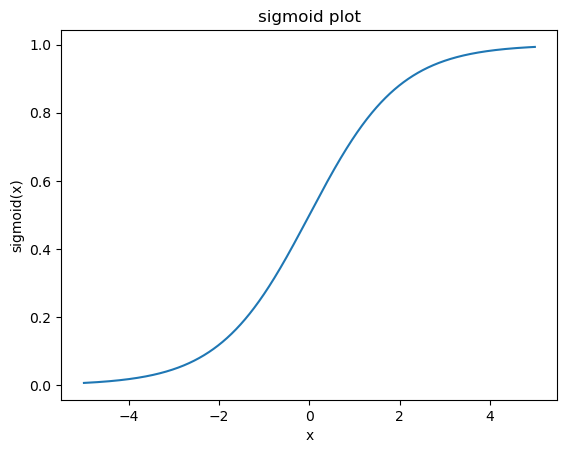

In [13]:
# Getting sample xs.
xs = np.linspace(-5, 5, 1000)

# Getting sample ys.
ys = sigmoid(xs)

plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('sigmoid plot')

### 1.4 - Cost function and gradient ##

Implement the cross entropy cost function and its gradient for logistic regression. **(20 Points)**

**Tasks:**
1. Implement the "cal_cost" to compute the cost.
2. Implement the "cal_grad" to compute the gradients.
3. Test "cal_cost" and "cal_grad" with initial values and print out the results.

**Hint:**
1. The cross entropy cost function (J(θ)) in logistic regression is shown below. It involves two terms, including ylog(h) and (1-y)log(1-h) where h is the function of x.

![](https://drive.google.com/uc?export=view&id=1xLhlPFI4wekwuA7lFm7ebRVt0XBZk3e7)

2. The gradient of the cost J(θ) is a vector of the same length as θ where the $j$th element (for $j = 0, 1, . . . , n)$ is defined below. You may do a hand calculation to justify the first order derivative with the term above.

![](https://drive.google.com/uc?export=view&id=1xfA0A0xyRv2L5JZIdedAmEZxZ3DwpOCF)

3. When you implement J(θ), please use eps = 1e-15 to prevent possible "divide by 0 exception" in second term. You may think about the reason.
4. You may consider the below templates for two functions:

    def cal_cost(theta, X, y):

        htheta = ...
        term1 = ...  /* matrix_multiplication(log(htheta), y)
        term2 = ...  /* matrix_multiplication(log(1-htheta+eps), (1-y))
        J = - 1 / m * (term1 + term2)
        
        return cost
        
    
    def cal_grad(theta, X, y):
        
        htheta = ...
        term1 = ... /* matrix_multiplication(transpose(X), (htheta - y))  //you may think about why transpose(x)
        grad = 1 / m * term1
    
        return grad
5. It involves matrix multiplication and you may consider the function of np.matmul or np.dot.   
        
6. Initialize the intercept term (constant term) with **ones** and the theta with **zeros**. Test the functions with these initial values. \
    **Expected outputs:**\
    Cost at initial theta : 0.6931471805599445\
    Gradient at inital theta : [-0.1        -10.91242026 -11.73652937]


In [76]:
# # Implement the cost function here
# def cal_cost(theta, X, y):
#     htheta = ...
#     term1 = ...  /* matrix_multiplication(log(htheta), y)
#     term2 = ...  /* matrix_multiplication(log(1-htheta+eps), (1-y))
#     J = - 1 / m * (term1 + term2)
#     return cost
    
# def cal_grad(theta, X, y):
#     htheta = ...
#     term1 = ... /* matrix_multiplication(transpose(X), (htheta - y))  //you may think about why transpose(x)
#     grad = 1 / m * term1
#     return grad

# # Cost function for logistic regression try 1
# def cal_cost(theta, X, y):
#     m = y.shape[0]
    
#     h = sigmoid(np.dot(X, theta))
    
#     eps = 1e-15
    
#     # Cross-entropy cost function
#     cost = -(1/m) * np.sum(y * np.log(h + eps) + (1 - y) * np.log(1 - h + eps))
#     return cost

# # Cost function for logistic regression try 2
# def cal_cost(theta, X, y):
    
#     # Get the number of samples to divide by.
#     m = X.shape[0]
    
#     # Use a small error rate to prevent undefined log(0) operation.
#     eps = 1e-15
    
#     cost = (-1/m) * (y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))
#     cost = np.sum(cost)
#     return cost

# # Cost function for logistic regression try 3
def cal_cost(theta, X, y):
    
    # Get the number of samples to divide by.
    m = X.shape[0]
    
    # Use a small error rate to prevent undefined log(0) operation.
    eps = 1e-15
    
    # htheta(x^i)
    htheta = sigmoid(np.matmul(np.transpose(theta), X))
    
    htheta = np.full((1, 80), htheta)
    print(htheta)
    
    # term 1 is y^i * log(htheta)
    term1 = np.dot(np.log(htheta + eps), y)
    print(term1)
    
    # term 2 is (1 - y) * log(1 - htheta)
    term2 = np.dot((1 - y), np.log(1 - htheta + eps))
    cost = -(1/m) * term1 + term2
    return cost
    
def cal_grad(theta, X, y):
    
    # Get the number of samples to divide by.
    m = X.shape[0]
    
    # htheta(x^i)
    htheta = np.matmul(np.transpose(theta), X)
    
    # term1 is (htheta - y) * X
    term1 = np.matmul(np.transpose(X), (htheta-y))
    
    grad = (1/m) * term1
    return grad

#################################################################
############################ TESTING ############################
#################################################################

# y_true and y_pred are identical, so the cross entropy cost is low.
y_pred = y_true
print(y_true)
print(y_pred)
print(cal_cost(y_pred, x1, y_true))
print(cal_grad(y_pred, x1, y_true), '\n')

# y_true and y_pred are completely opposite, every value negated from y_true into y_pred.
# so the cross entropy cost is as high as it can go.
y_pred = 1-y_true
print(y_true)
print(y_pred)
print(cal_cost(y_pred, x1, y_true), '\n')

# y_pred has randomly selected values, so the cross entropy cost will yield some realistic value.
y_pred = np.random.rand(80,)
print(y_true)
print(y_pred)
print(cal_cost(y_pred, x1, y_true), '\n')

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]]
[5.32907052e-14]


ValueError: shapes (80,) and (1,80) not aligned: 80 (dim 0) != 1 (dim 0)

In [ ]:
a = np.arange(3)
print(a)
b = 10 * np.arange(3) + 3
print(b)
c = np.matmul(a, b)
print(c)

In [ ]:
# Define the input (features)
input_vector = np.array([1, 2, 3])  # Example input vector

# Define the weights
weights = np.array([0.5, 0.25, -0.75])  # Example weights

# Multiply the input by the weights (element-wise)
weighted_sum = np.dot(input_vector, weights)  # Dot product of the input and weights

print(weighted_sum)

## 1.5 Train parameters with Gradient Descent ##


Train parameters using Gradient Descent. **(10 Points)**

**Tasks:**
1. Calculate best fit theta by Gradient Descent with learning rate of **0.001 (1e-3)** and epoch of **80K**. The initial theta from above blocks is used as initial values.
2. Print out the best theta (the last one is considered as the best here) and its corresponding cost.
3. **Plot the decision boundary**.

**Hints:**
1. You may take gradient descent in homework 1 as an template.
2. Derive the boundary line from **sigmoid(theta[0]+ X1 * theta[1] + X2* theta[2])=0.5**. Think about why we get the line by setting **the activated probability to 0.5**. Also, try to calculate the final relationship between X1 and X2. When sigmoid(X) = 0.5, what is the value of x? Check the generated plot in 1.3.
3. The validation of first 5 epochs (updated theta and cost): \
------Epoch 0------\
Theta: [0.0001     0.01091242 0.01173653]\
Cost: 0.6996118077359638\
------Epoch 1------\
Theta: [-0.0001129   0.00053949  0.00229352]\
Cost: 0.6649331468590681\
------Epoch 2------\
Theta: [-5.93604956e-05  8.33145873e-03  1.07754324e-02]\
Cost: 0.6679914364992459\
------Epoch 3------\
Theta: [-0.0002356   0.0004607   0.00370829]\
Cost: 0.6545873034874964\
------Epoch 4------\
Theta: [-0.00020363  0.00683227  0.01065138]\
Cost: 0.6563302142684528
4. You may take the plots below as an exmample:

![](https://drive.google.com/uc?export=view&id=1xLg9LrIF888gGXj3zRAG9iJLsyAmgPQg)

5. It may take ~1 min to finish running.

In [78]:
# What is theta??
sigmoid(theta[0] + x1 * theta[1] + x2 * theta[2])

NameError: name 'theta' is not defined

In [ ]:
# Gradient Descent Implementation Here

# To make a multilinear regression function in the shape of Y = X1 + X2 + C
# We will need to train the model with different variables.
m1 = 0
m2 = 0
m3 = 0

L = 0.001  # The learning Rate
epochs = 80000  # The number of iterations to perform gradient descent

n = float(len(x1)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    # The current predicted value of y.
    y_pred = m1*x1 + m2*x2 + m3
    
    # Get the derivatives of m1 and m2.
    D_m1 = (-2/n) * sum(x1 * (y - y_pred))
    D_m2 = (-2/n) * sum(x2 * (y - y_pred))
    D_m3 = (-2/n) * sum(y - y_pred)
    
    # Update coefficients.
    m1 = m1 - L * D_m1
    m2 = m2 - L * D_m2
    m3 = m3 - L * D_m3
    
    if i < 5:
        print(f'Epoch {i}: {m1} {m2} {m3}')

In [ ]:
# Draw Decision Boundary Here



### 1.6 Evaluating Logistic Regression

Evaluate the model with given data. **(10 Points)**

**Tasks:**
1. Calculate the training accuracy and **PRINT IT OUT**.
2. Evaluate the predicted probability of the learnt model with x1 = 56 and x2 = 32 and **PRINT IT OUT**.


**Hints:**  
1. Positive(prediction>0.5) and negative(prediction<=0.5).
2. The prediction results are based on acceptance probability. Given the two exam scores, we expected the model yields either high probability of "fail" or low probability of "pass".
3. Training accuracy should be around **85%**.

In [ ]:
# Evaluate the model
